# Part 3: 

## Replicating Lazarevic Work on the negative Dataset 

### Dataset used: 2014 to 2017, average of AAA rated bonds, forward curve, daily data

The aim of Part 3 is to replicate the results from Milan Lazarevic from his paper - this is the negative dataset that refers to the negative interest rate environment that was prevalent between 2014 and 2017 in the Eurozone. 

I have sourced the data from the same source of the author Milan Lazarevic from his paper "Principal component analysis in negative interest rate environment" published in 2019 in the Acta Oeconomica Vol 69. 

You can find it here under daily data: https://ec.europa.eu/eurostat/data/database 

The folder to look for is >Data navigation tree> Database by themes > Economy and finance > Interest rates (irt)> Euro yield curves daily data 


### Data set picking and elaboration

I have, as the author, picked the forward curve instead of the spot curve and the average of the AAA rated bonds instead of the average of the entire euro area. 

My decision to pick the AAA average instead of the entire average of the entire eurozone is just to ensure consistency when comparing my result to his paper results in Parts 2 and 3. 

The decision to pick the forward curve instead of the spot curve comes from the critique that Lekkos provided in his paper of 2000. 

As Lazarevic states at page 109 "Data from the forward rate yield curve were used as the basis, instead of those from the zero-coupon rates, in accordance with the conclusions of Lord – Pelsser (2007) based on the criticism of Lekkos (2000). He pointed out the inadequacy of PCA’s approach to the yield curves of previous authors, primarily by Litterman – Scheinkman (1991) and Steeley (1990), in terms of choosing a zero-coupon rate. The rationale of Lekkos is that on the basis of these data we get a distorted picture (overestimation). The key argument is that zero yield represents the average of continuously compounded forward rates.

The maturities picked are 1y, 2y, 3y, 4y, 5y, 7y, 10, 15y, 20y and 30y, as the author Milan Lazarevic. 

Before using these in R, I have worked on them one step prior on Excel. Meaning that I downloaded the daily data of the forward curve for the AAA rated bonds in Excel and took the first difference to get stationarity. He does this as well by stating this at page 114 "Therefore, it is recommended by Lardic et al. (2003) that the PCA is to be implemented on interest rate changes, since the use of the first differences provides evidence for stationarity of the time series com- prising the yield curve."


## Code

In [1]:
#Loading the dataset

library("readxl")
library("dplyr")

data <- read_excel("fw_2014to2017_diff.xlsx")
head(data)



Attaching package: ‘dplyr’




The following objects are masked from ‘package:stats’:

    filter, lag




The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




Date,oney,twoy,threey,foury,fivey,seveny,teny,fifteeny,twentyy,thirtyy
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2014M06D06,-0.03,-0.09,-0.14,-0.15,-0.16,-0.14,-0.06,0.03,0.06,0.05
2014M06D09,0.02,0.04,0.05,0.04,0.03,0.00,-0.03,-0.02,0.00,0.03
2014M06D10,0.01,0.04,0.05,0.05,0.05,0.05,0.03,0.00,-0.01,-0.01
2014M06D11,-0.02,-0.02,-0.01,0.00,0.00,0.01,0.01,0.00,-0.01,-0.03
2014M06D12,-0.01,-0.02,-0.02,-0.01,0.00,0.02,0.05,0.06,0.04,0.02
2014M06D13,-0.01,0.00,0.00,-0.01,0.00,-0.02,-0.04,-0.05,-0.03,-0.02


In [2]:
# Selecting all columns apart from "Date"

data <- select(data, -c("Date"))
head(data)
summary(data)


oney,twoy,threey,foury,fivey,seveny,teny,fifteeny,twentyy,thirtyy
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
-0.03,-0.09,-0.14,-0.15,-0.16,-0.14,-0.06,0.03,0.06,0.05
0.02,0.04,0.05,0.04,0.03,0.00,-0.03,-0.02,0.00,0.03
0.01,0.04,0.05,0.05,0.05,0.05,0.03,0.00,-0.01,-0.01
-0.02,-0.02,-0.01,0.00,0.00,0.01,0.01,0.00,-0.01,-0.03
-0.01,-0.02,-0.02,-0.01,0.00,0.02,0.05,0.06,0.04,0.02
-0.01,0.00,0.00,-0.01,0.00,-0.02,-0.04,-0.05,-0.03,-0.02


      oney                 twoy                threey         
 Min.   :-0.1000000   Min.   :-0.1200000   Min.   :-0.140000  
 1st Qu.:-0.0100000   1st Qu.:-0.0200000   1st Qu.:-0.020000  
 Median : 0.0000000   Median : 0.0000000   Median : 0.000000  
 Mean   :-0.0008462   Mean   :-0.0009058   Mean   :-0.001013  
 3rd Qu.: 0.0100000   3rd Qu.: 0.0100000   3rd Qu.: 0.010000  
 Max.   : 0.1200000   Max.   : 0.1500000   Max.   : 0.140000  
     foury               fivey               seveny               teny         
 Min.   :-0.170000   Min.   :-0.250000   Min.   :-0.320000   Min.   :-0.32000  
 1st Qu.:-0.020000   1st Qu.:-0.030000   1st Qu.:-0.030000   1st Qu.:-0.04000  
 Median : 0.000000   Median : 0.000000   Median : 0.000000   Median : 0.00000  
 Mean   :-0.001144   Mean   :-0.001299   Mean   :-0.001645   Mean   :-0.00205  
 3rd Qu.: 0.020000   3rd Qu.: 0.020000   3rd Qu.: 0.030000   3rd Qu.: 0.03000  
 Max.   : 0.170000   Max.   : 0.210000   Max.   : 0.260000   Max.   : 0.30000  

In [3]:
# Transforming my data frame to Matrix 

X <- as.matrix(data)
X
summary(X)

oney,twoy,threey,foury,fivey,seveny,teny,fifteeny,twentyy,thirtyy
-0.03,-0.09,-0.14,-0.15,-0.16,-0.14,-0.06,0.03,0.06,0.05
0.02,0.04,0.05,0.04,0.03,0.00,-0.03,-0.02,0.00,0.03
0.01,0.04,0.05,0.05,0.05,0.05,0.03,0.00,-0.01,-0.01
-0.02,-0.02,-0.01,0.00,0.00,0.01,0.01,0.00,-0.01,-0.03
-0.01,-0.02,-0.02,-0.01,0.00,0.02,0.05,0.06,0.04,0.02
-0.01,0.00,0.00,-0.01,0.00,-0.02,-0.04,-0.05,-0.03,-0.02
0.00,-0.01,-0.02,-0.03,-0.04,-0.04,-0.04,-0.02,-0.02,-0.01
0.01,0.02,0.03,0.05,0.05,0.06,0.05,0.02,-0.01,-0.02
0.00,0.00,0.00,-0.02,-0.02,-0.03,-0.03,-0.02,0.00,0.01
-0.01,-0.04,-0.06,-0.07,-0.09,-0.11,-0.09,-0.05,0.00,0.04


      oney                 twoy                threey         
 Min.   :-0.1000000   Min.   :-0.1200000   Min.   :-0.140000  
 1st Qu.:-0.0100000   1st Qu.:-0.0200000   1st Qu.:-0.020000  
 Median : 0.0000000   Median : 0.0000000   Median : 0.000000  
 Mean   :-0.0008462   Mean   :-0.0009058   Mean   :-0.001013  
 3rd Qu.: 0.0100000   3rd Qu.: 0.0100000   3rd Qu.: 0.010000  
 Max.   : 0.1200000   Max.   : 0.1500000   Max.   : 0.140000  
     foury               fivey               seveny               teny         
 Min.   :-0.170000   Min.   :-0.250000   Min.   :-0.320000   Min.   :-0.32000  
 1st Qu.:-0.020000   1st Qu.:-0.030000   1st Qu.:-0.030000   1st Qu.:-0.04000  
 Median : 0.000000   Median : 0.000000   Median : 0.000000   Median : 0.00000  
 Mean   :-0.001144   Mean   :-0.001299   Mean   :-0.001645   Mean   :-0.00205  
 3rd Qu.: 0.020000   3rd Qu.: 0.020000   3rd Qu.: 0.030000   3rd Qu.: 0.03000  
 Max.   : 0.170000   Max.   : 0.210000   Max.   : 0.260000   Max.   : 0.30000  

### For reference, compare this Correlation Matrix to Lazarevic's at page 115. Outcome: same results

In [4]:
# Using the Correlation Matrix
R <- cor(X)
R

,oney,twoy,threey,foury,fivey,seveny,teny,fifteeny,twentyy,thirtyy
oney,1.0000000,0.7467732,0.5675521,0.4915096,0.4317059,0.3754605,0.3108292,0.2802612,0.3113723,0.3103705
twoy,0.7467732,1.0000000,0.9033645,0.7816682,0.6680555,0.5505669,0.4814009,0.4533441,0.4294919,0.2841078
threey,0.5675521,0.9033645,1.0000000,0.9445068,0.8657556,0.7541648,0.6616158,0.6077071,0.5690253,0.3738293
foury,0.4915096,0.7816682,0.9445068,1.0000000,0.9660479,0.8920900,0.7884906,0.7105566,0.6811410,0.4851627
fivey,0.4317059,0.6680555,0.8657556,0.9660479,1.0000000,0.9616110,0.8703719,0.7860346,0.7636917,0.5658801
seveny,0.3754605,0.5505669,0.7541648,0.8920900,0.9616110,1.0000000,0.9527289,0.8808913,0.8482403,0.6052317
teny,0.3108292,0.4814009,0.6616158,0.7884906,0.8703719,0.9527289,1.0000000,0.9682210,0.8995250,0.5473875
fifteeny,0.2802612,0.4533441,0.6077071,0.7105566,0.7860346,0.8808913,0.9682210,1.0000000,0.9415493,0.5585883
twentyy,0.3113723,0.4294919,0.5690253,0.6811410,0.7636917,0.8482403,0.8995250,0.9415493,1.0000000,0.7825732
thirtyy,0.3103705,0.2841078,0.3738293,0.4851627,0.5658801,0.6052317,0.5473875,0.5585883,0.7825732,1.0000000


### For reference, compare these Eigenvalues  to Lazarevic's at page 116. Outcome: same results

In [5]:
# Spectral Decomposition of the correlation Matrix

pcaR <- eigen(R)
pcaR

eigen() decomposition
$values
 [1] 7.081935930 1.489388824 0.735747241 0.404957136 0.213210153 0.035268762
 [7] 0.016422141 0.010809757 0.007074150 0.005185905

$vectors
            [,1]         [,2]        [,3]        [,4]        [,5]         [,6]
 [1,] -0.2025514  0.504199972  0.53237627 -0.45862533 -0.40867309  0.204043169
 [2,] -0.2768700  0.511087099  0.02841558 -0.01659805  0.50566587 -0.573857099
 [3,] -0.3263470  0.329304496 -0.20859344  0.24628822  0.27006673  0.366943024
 [4,] -0.3516696  0.155736733 -0.22665738  0.29657559 -0.13697074  0.315356697
 [5,] -0.3595449  0.007339863 -0.19156365  0.24346679 -0.35409096  0.004310461
 [6,] -0.3582167 -0.146433946 -0.14808043  0.01792139 -0.40619756 -0.341290894
 [7,] -0.3439817 -0.244345780 -0.16653761 -0.31996446 -0.10150874 -0.342563247
 [8,] -0.3300123 -0.290099384 -0.08768889 -0.43925719  0.27249290  0.167137816
 [9,] -0.3283068 -0.328659278  0.21693581 -0.15519428  0.32851509  0.329953517
[10,] -0.2439950 -0.280179901  0.6926568

### For reference, compare these explained variances to Lazarevic's at page 116. Outcome: same results

Note that the cumulative explained variance of the first three PCs in a negative interest rate environment here is shown to be 93.07%. 

Lazarevic assumes that this lower value is due to the fact that our dataset is being affected by a negative interest rates environment.

To achieve the same explained variability from the positive dataset, in Part 2, we would need to add the fourth component. 

The fourth component is called oscillatority by Lazarevic due to the fact that there are 3 sign changes in this. 

With the fourth PC, the variability explained is of 97.1%, more similar to Part 2. 

In [6]:
#Relative Variences
pcaData <- prcomp(data, scale = T, center = T)
vars <- pcaData$sdev^2/sum(pcaData$sdev^2)*100
vars


[1] 70.81935930 14.89388824  7.35747241  4.04957136  2.13210153  0.35268762
 [7]  0.16422141  0.10809757  0.07074150  0.05185905

In [7]:
# Using the function prcomp() to obtain principal components

pcaData <- prcomp(data, scale = T, center = T)
pcaData
summary(pcaData)

Standard deviations (1, .., p=10):
 [1] 2.66119070 1.22040519 0.85775710 0.63636243 0.46174685 0.18779979
 [7] 0.12814890 0.10396998 0.08410796 0.07201323

Rotation (n x k) = (10 x 10):
               PC1          PC2         PC3         PC4         PC5
oney     0.2025514 -0.504199972 -0.53237627 -0.45862533 -0.40867309
twoy     0.2768700 -0.511087099 -0.02841558 -0.01659805  0.50566587
threey   0.3263470 -0.329304496  0.20859344  0.24628822  0.27006673
foury    0.3516696 -0.155736733  0.22665738  0.29657559 -0.13697074
fivey    0.3595449 -0.007339863  0.19156365  0.24346679 -0.35409096
seveny   0.3582167  0.146433946  0.14808043  0.01792139 -0.40619756
teny     0.3439817  0.244345780  0.16653761 -0.31996446 -0.10150874
fifteeny 0.3300123  0.290099384  0.08768889 -0.43925719  0.27249290
twentyy  0.3283068  0.328659278 -0.21693581 -0.15519428  0.32851509
thirtyy  0.2439950  0.280179901 -0.69265688  0.51163043  0.05230556
                  PC6         PC7          PC8          PC9       

Importance of components:
                          PC1    PC2     PC3    PC4     PC5     PC6     PC7
Standard deviation     2.6612 1.2204 0.85776 0.6364 0.46175 0.18780 0.12815
Proportion of Variance 0.7082 0.1489 0.07357 0.0405 0.02132 0.00353 0.00164
Cumulative Proportion  0.7082 0.8571 0.93071 0.9712 0.99252 0.99605 0.99769
                           PC8     PC9    PC10
Standard deviation     0.10397 0.08411 0.07201
Proportion of Variance 0.00108 0.00071 0.00052
Cumulative Proportion  0.99877 0.99948 1.00000

## For reference, see Lazarevic page 116. Same values. 

In [9]:
pcaData$rotation

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
oney,0.2025514,-0.504199972,-0.53237627,-0.45862533,-0.40867309,-0.204043169,0.04602696,0.003323896,-0.013934206,0.004758559
twoy,0.2768700,-0.511087099,-0.02841558,-0.01659805,0.50566587,0.573857099,-0.27395652,-0.017501593,-0.001765468,-0.026048079
threey,0.3263470,-0.329304496,0.20859344,0.24628822,0.27006673,-0.366943024,0.64463530,-0.193631101,0.134882228,0.045419941
foury,0.3516696,-0.155736733,0.22665738,0.29657559,-0.13697074,-0.315356697,-0.35261234,0.684562055,-0.039593858,0.002185087
fivey,0.3595449,-0.007339863,0.19156365,0.24346679,-0.35409096,-0.004310461,-0.28277113,-0.600234969,-0.455400309,0.040877313
seveny,0.3582167,0.146433946,0.14808043,0.01792139,-0.40619756,0.341290894,0.06395686,-0.058552616,0.676872540,-0.284319651
teny,0.3439817,0.244345780,0.16653761,-0.31996446,-0.10150874,0.342563247,0.35817761,0.266271773,-0.283133820,0.533712916
fifteeny,0.3300123,0.290099384,0.08768889,-0.43925719,0.27249290,-0.167137816,0.02450618,0.034267668,-0.271516168,-0.654686718
twentyy,0.3283068,0.328659278,-0.21693581,-0.15519428,0.32851509,-0.329953517,-0.36416043,-0.208797154,0.367313572,0.430269117
thirtyy,0.2439950,0.280179901,-0.69265688,0.51163043,0.05230556,0.155901827,0.19335109,0.119091670,-0.160283830,-0.126991347


In [10]:
#Eigenvalues
pcaR$values


[1] 7.081935930 1.489388824 0.735747241 0.404957136 0.213210153 0.035268762
 [7] 0.016422141 0.010809757 0.007074150 0.005185905

In [11]:
# Calculate the Principal Components
factors <- X %*% pcaR$vectors
factors

# Principal Components from 1 to 5
pc1 <- factors[ ,1] 
pc2 <- factors[ ,2] 
pc3 <- factors[ ,3] 
pc4 <- factors[ ,4] 
pc5 <- factors[ ,5] 


0.215951741,-0.139031390,0.151065025,-0.082887768,0.0996002397,0.0315114163,1.072993e-02,-0.0086129115,0.0113984542,-0.0034174002
-0.046696455,0.058169337,0.014070885,0.055378000,0.0086195221,0.0144743986,5.828503e-03,0.0060404642,-0.0002648680,-0.0040894256
-0.087485651,0.041540859,-0.046376414,0.021799128,-0.0220731911,-0.0156653022,-5.615865e-03,0.0001744482,-0.0050637573,0.0021924067
0.016432830,-0.015814594,-0.035225148,-0.009775815,-0.0145719037,-0.0017341734,-1.746545e-04,-0.0028122780,-0.0040379376,0.0019725729
-0.044569780,-0.074709099,0.006527116,-0.040943695,0.0072786872,-0.0049013243,-5.611271e-03,-0.0055723380,0.0075503985,-0.0040678863
0.057695530,0.036071489,-0.009410844,0.030446727,-0.0068854701,0.0001968893,6.707905e-03,0.0141899803,-0.0040852604,0.0066345292
0.077921787,0.014145504,0.021423195,-0.004541275,0.0155798037,0.0077379484,2.897297e-04,-0.0015110818,-0.0006611796,-0.0065660283
-0.090043409,0.015381584,-0.056264760,-0.002916198,-0.0387531910,-0.0168894200,-4.562022e-03,-0.0082825516,0.0003200140,-0.0021877896
0.039450537,0.011462048,0.026483308,0.012161893,0.0201256204,0.0092205065,-1.487023e-03,0.0074125531,-0.0019152068,0.0034807749
0.166760045,-0.015409285,0.102529917,0.017054106,0.0513973256,0.0302140873,1.081037e-02,-0.0039131057,0.0059348555,0.0053329081
-0.126796928,-0.002725471,-0.040045132,-0.030032705,-0.0101646005,-0.0051726934,-4.184320e-03,0.0037687019,-0.0006654698,-0.0068778246


## Shift, Slope and Curvature

With the term **shift** it is here meant the shift of the entire yield curve. If the front end (the front end part of the curve means the short term maturities) shifts lower and lower, the 10y maturity and the rest of the curve will shift accordingly. Being the 10year maturity here in the ‘middle’ of the curve, this will be the maturity chosen to represent the shift of the yield curve. 

With the term **slope** it is here meant a spread. A spread is the difference between two financial assets, here bonds and their yields. The spread considered for the slope is the common 2s10s spread. This is calculated by the 10year yield minus the 2 year yield. 

With the term **curvature** it will here be meant the ‘butterfly’ spread. A butterfly spread in financial terms is the spread within a butterfly trade. A butterfly trade consists picking two points on the curve and selling (buying) them while simultaneously picking a point between these two and buying (selling) it. The former trade is performed if one is betting that the curve in the chosen part of the curve is going to flatten and/or its curvature is going to look more convex. The latter is performed if one is betting that the chosen part of the curve is going to steepen and/or its curvature is going to look more concave. The butterfly trade can be expressed in any part of the curve – but the butterfly spread chosen here is to express the curvature of the entire curve, hence the picked butterfly spread here is the 7s15s30s spread. This is calculated by multiplying the 15 years yield by two and subtracting the 15 years yield and the 30 years yield. 

Accordingly to previous literature: the first PC should represent the shift, the second PC should represent the slope and the third PC should represent the curvature. 
We can show this here by looking at the absolute value of their respective correlations - if, in absolute values, this is near 1 (and/or above 0.5), we can state that these statement are being illustrated in a satisfactory manner. 


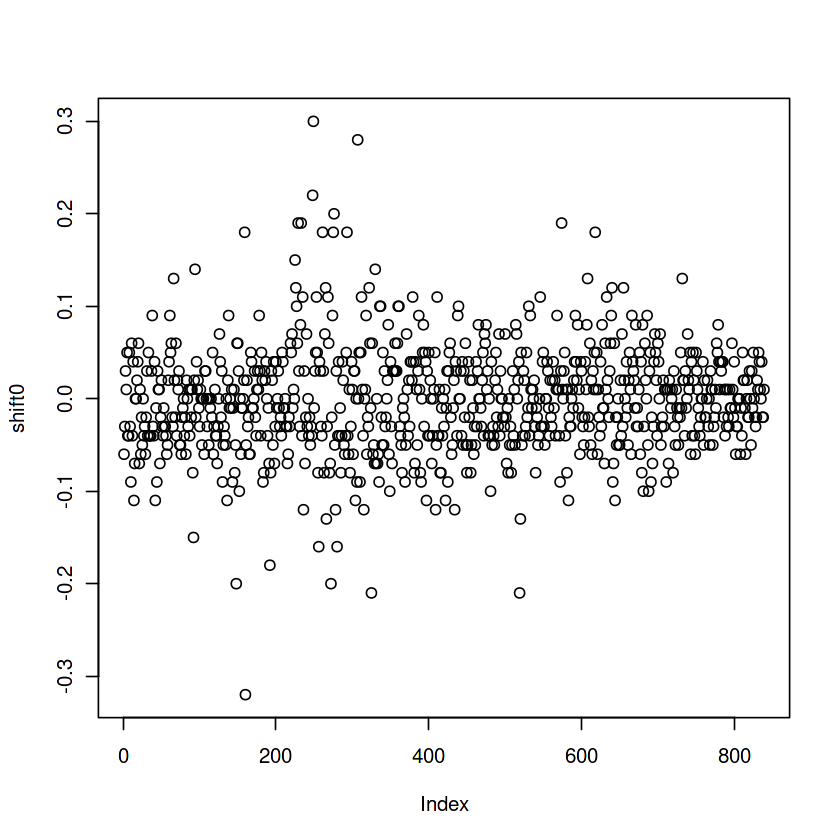

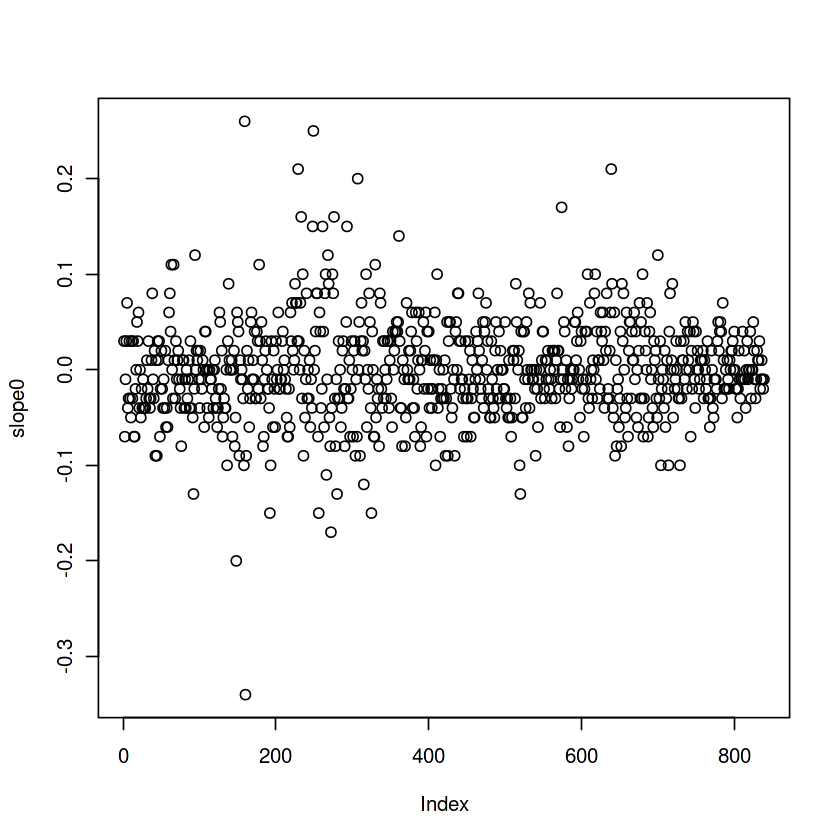

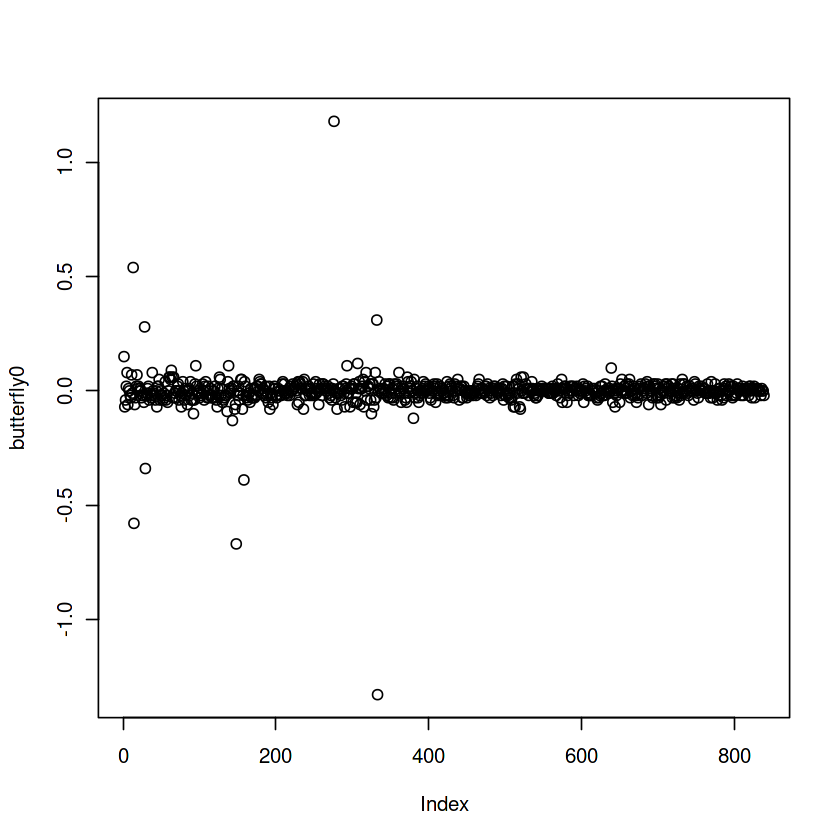

In [17]:
shift0 <- (data$teny)
plot(shift0)

slope0 <- (data$teny - data$twoy)
plot(slope0)

butterfly0 <- (2*data$fifteeny - data$seveny - data$thirtyy)
plot(butterfly0)

## Correlations of PC1 with Shift, PC2 with Slope, PC3 with Curvature

In [18]:
cor(shift0, pc1) 
cor(slope0, pc2)
cor(butterfly0, pc3)


[1] -0.9431184

[1] -0.8900945

[1] -0.6607434

Given how high these correlations are, in absolute terms, this is here shown to be the case. 

The first PC represents the shift, the second the slope and the third the curvature of an yield curve. 


## Plots

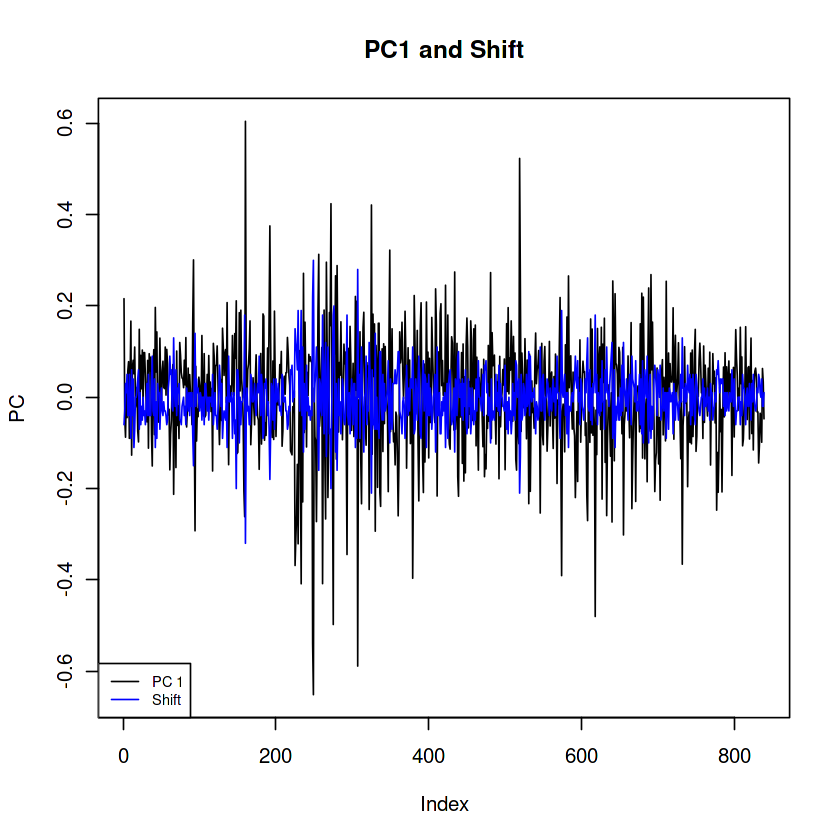

In [19]:
yLimits <- c(min(pc1, pc5) , max(pc1, pc5))
plot(pc1, type = "l", ylim = yLimits, main = "PC1 and Shift",
     xlab = "Index", ylab = "PC")
lines(shift0, col = "blue")
legend("bottomleft", legend = c("PC 1", "Shift"),
       col = c("black", "blue"), lwd = 1, cex = 0.7)

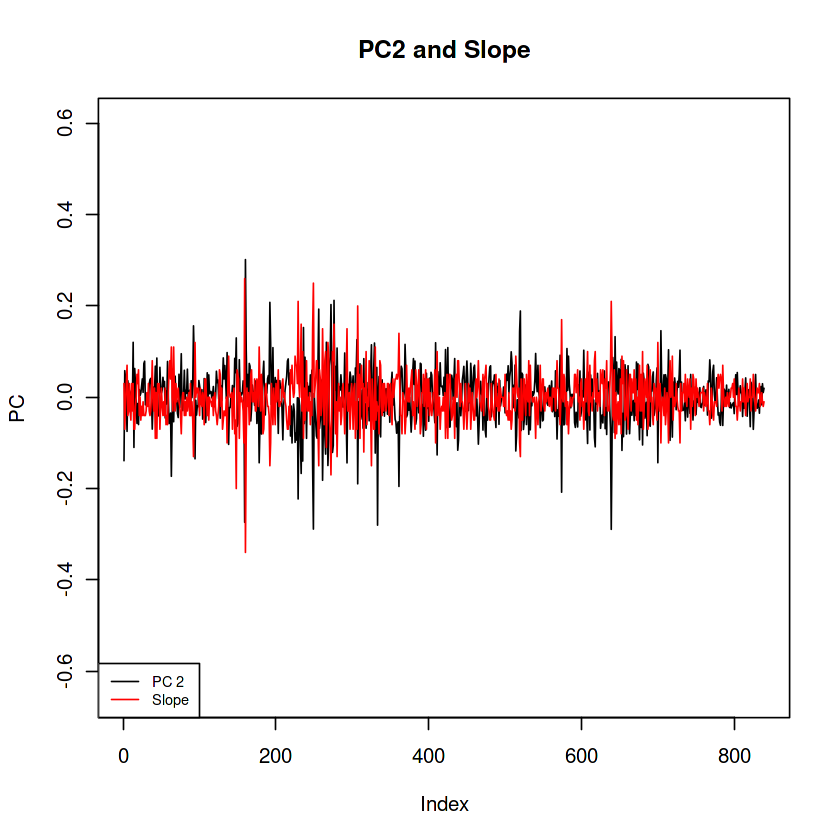

In [20]:
yLimits <- c(min(pc1, pc5) , max(pc1, pc5))
plot(pc2, type = "l", ylim = yLimits, main = "PC2 and Slope",
     xlab = "Index", ylab = "PC")
lines(slope0, col = "red")
legend("bottomleft", legend = c("PC 2", "Slope"),
       col = c("black", "red"), lwd = 1, cex = 0.7)

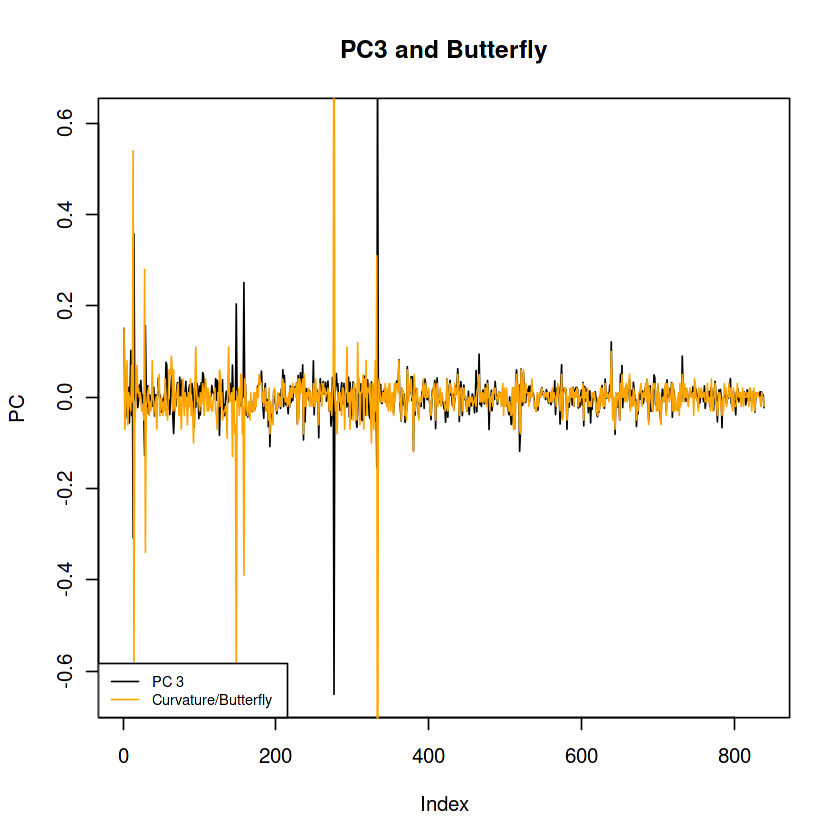

In [21]:
yLimits <- c(min(pc1, pc5) , max(pc1, pc5))
plot(pc3, type = "l", ylim = yLimits, main = "PC3 and Butterfly",
     xlab = "Index", ylab = "PC")
lines(butterfly0, col = "orange")
legend("bottomleft", legend = c("PC 3", "Curvature/Butterfly"),
       col = c("black", "orange"), lwd = 1, cex = 0.7)

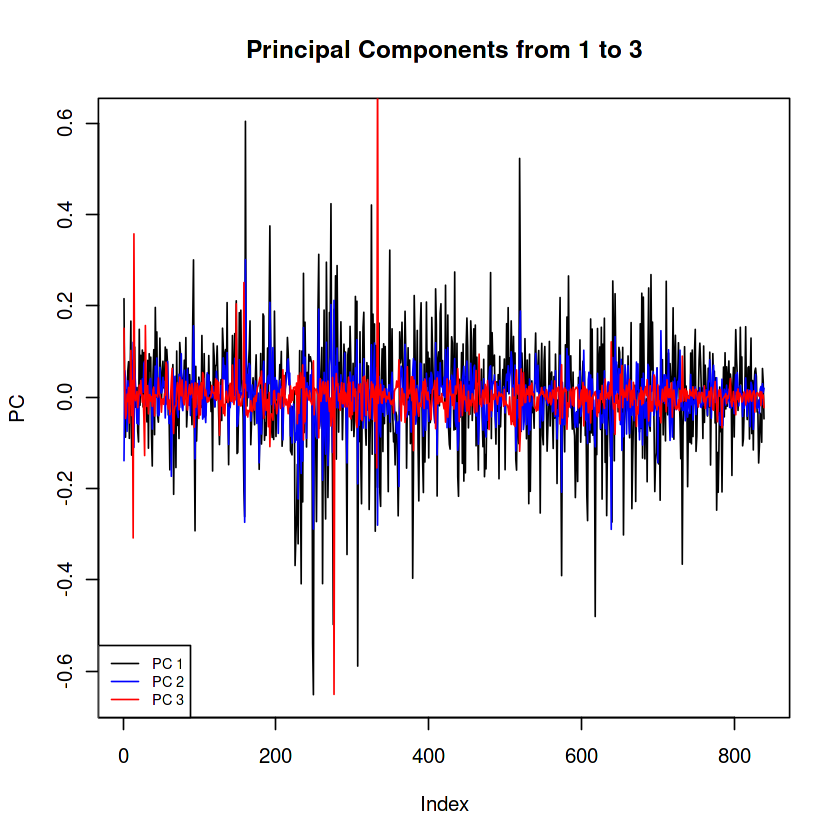

In [22]:
yLimits <- c(min(pc1, pc5) , max(pc1, pc5))
plot(pc1, type = "l", ylim = yLimits, main = "Principal Components from 1 to 3",
     xlab = "Index", ylab = "PC")
lines(pc2, col = "blue")
lines(pc3, col = "red")
legend("bottomleft", legend = c("PC 1", "PC 2", "PC 3"),
       col = c("black", "blue", "red"), lwd = 1, cex = 0.7)

## Loadings of the first three components

The first component has no sign change. The second component has 1 sign change. The third component has 2 sign changes. 

Also this can allude to the properties of shift, slope and curvature. 

Plotted also the fourth PC, called 'oscillatority' by Lazarevic due to its several (3) sign changes.

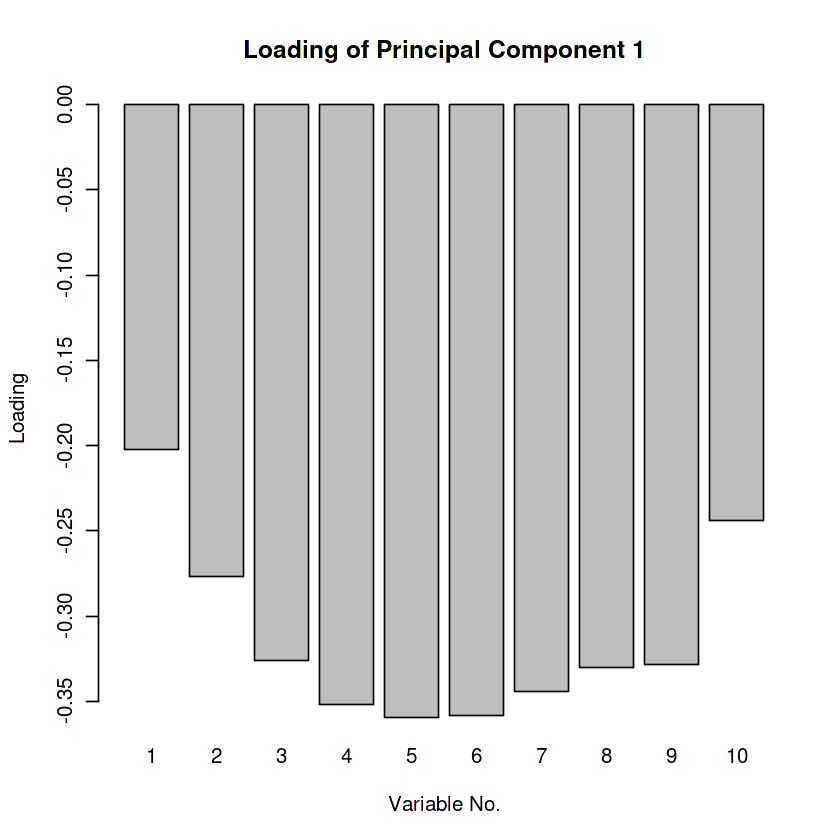

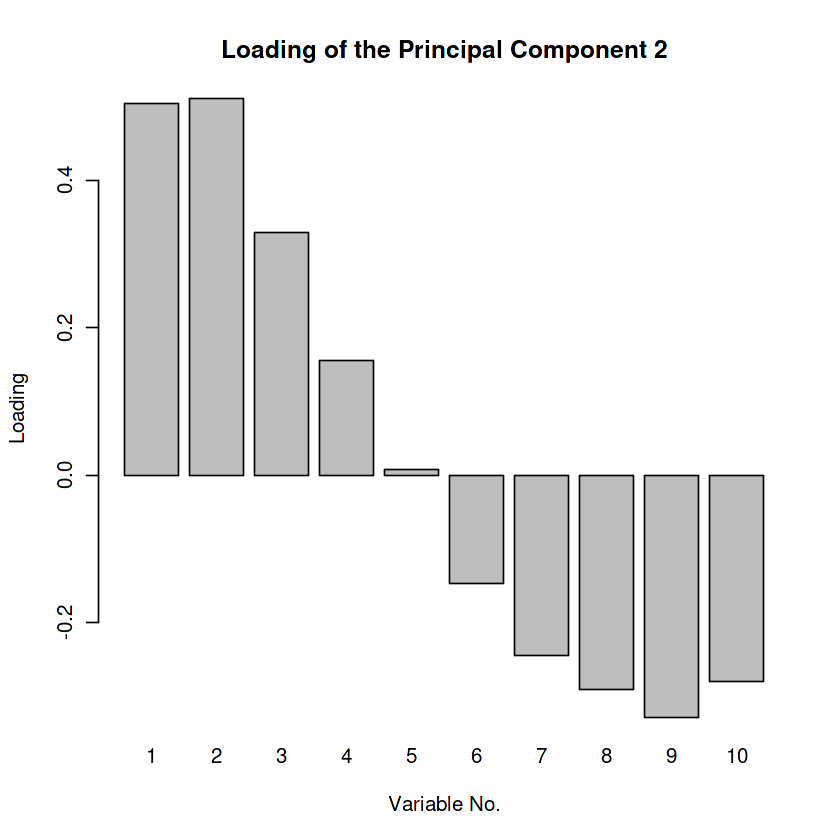

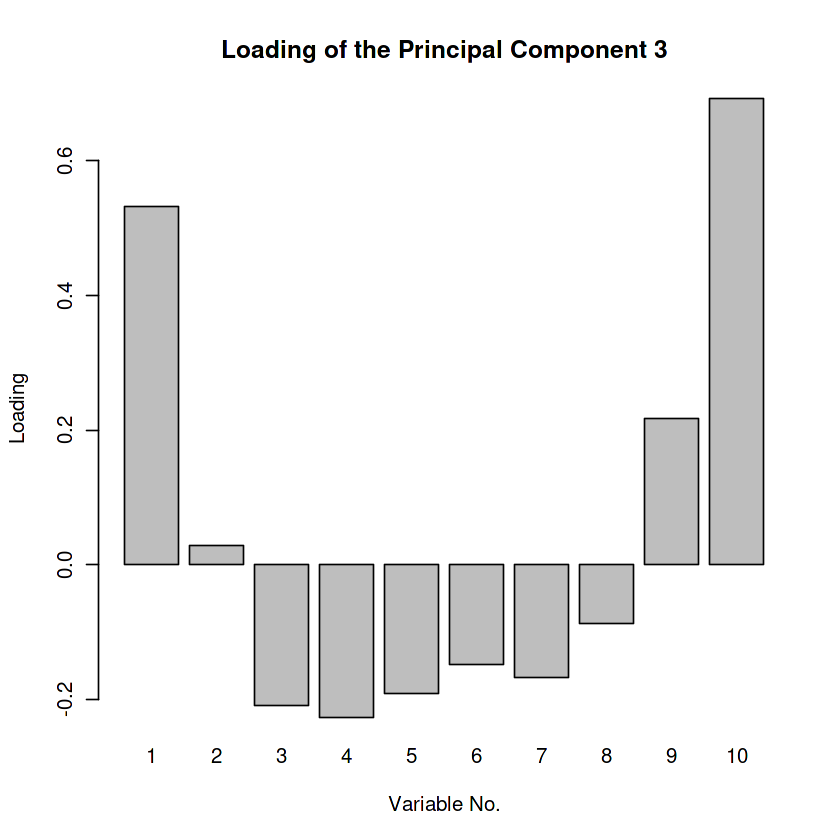

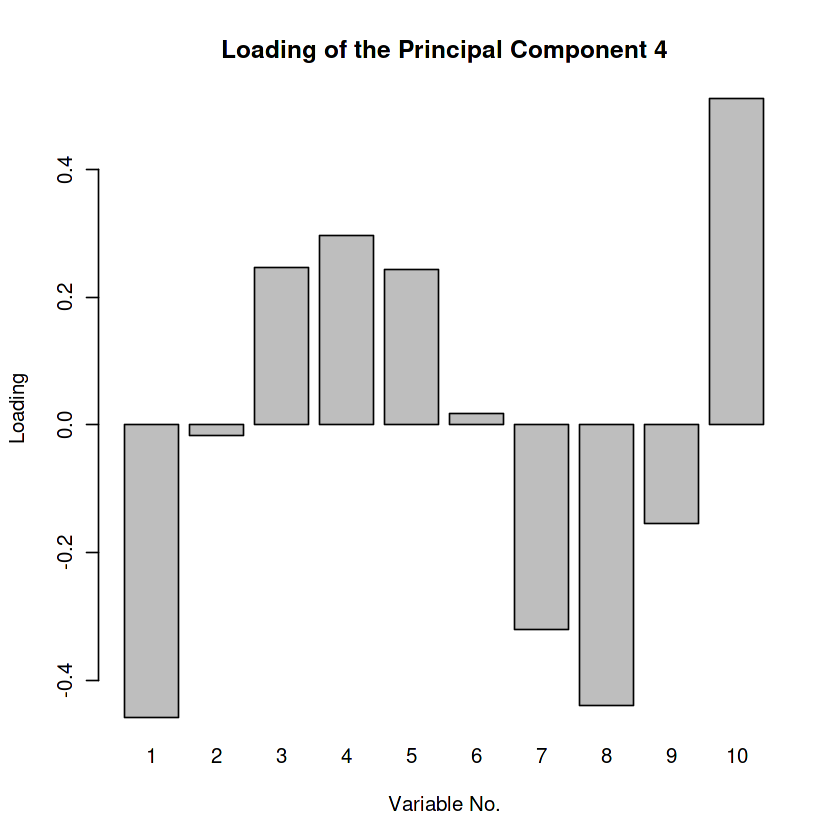

In [23]:
# Plot the loadings of the first three components
barplot(pcaR$vectors[, 1], main = "Loading of Principal Component 1",
        names.arg = as.character(1:10), xlab = "Variable No.", ylab = "Loading")
barplot(pcaR$vectors[, 2], main = "Loading of the Principal Component 2",
        names.arg = as.character(1:10), xlab = "Variable No.", ylab = "Loading")
barplot(pcaR$vectors[, 3], main = "Loading of the Principal Component 3",
        names.arg = as.character(1:10), xlab = "Variable No.", ylab = "Loading")
barplot(pcaR$vectors[, 4], main = "Loading of the Principal Component 4",
        names.arg = as.character(1:10), xlab = "Variable No.", ylab = "Loading")

## Explained variability

In [24]:
#Relative Variences
vars <- pcaData$sdev^2/sum(pcaData$sdev^2)*100
vars


[1] 70.81935930 14.89388824  7.35747241  4.04957136  2.13210153  0.35268762
 [7]  0.16422141  0.10809757  0.07074150  0.05185905

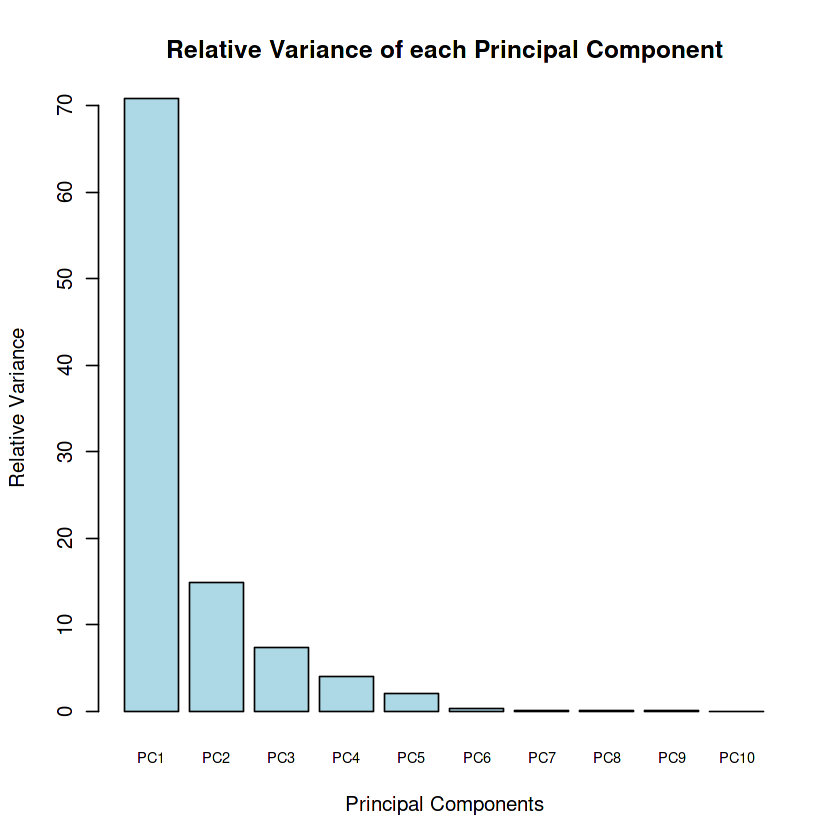

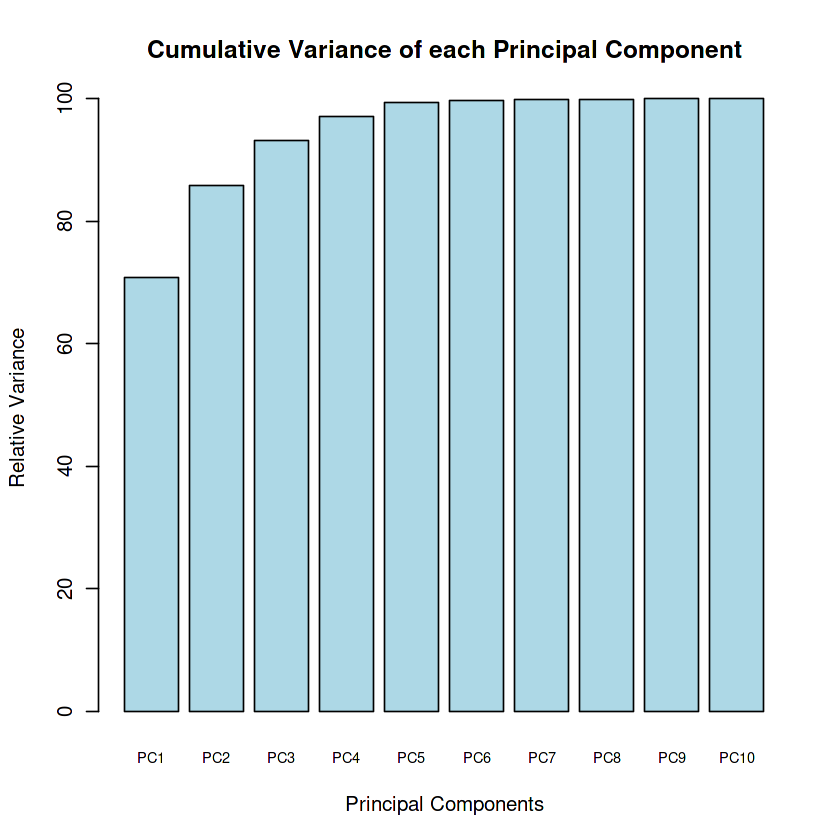

In [25]:
# Barplot of the relative variances
barplot(pcaData$sdev^2/sum(pcaData$sdev^2)*100, 
        names.arg = colnames(pcaData$rotation), 
        cex.names = 0.7, col = "lightblue", xlab = "Principal Components",
        ylab = "Relative Variance",
        main = "Relative Variance of each Principal Component")

# Barplot of the cumulative percentage of the variances 
barplot(cumsum(pcaData$sdev^2)/sum(pcaData$sdev^2)*100, 
        names.arg = colnames(pcaData$rotation), 
        cex.names = 0.7, col = "lightblue", xlab = "Principal Components",
        ylab = "Relative Variance",
        main = "Cumulative Variance of each Principal Component")
